Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6125 - loss: 0.4869 - val_accuracy: 0.8704 - val_loss: 0.3860
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8779 - loss: 0.4014 - val_accuracy: 0.8704 - val_loss: 0.3874
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9141 - loss: 0.3163 - val_accuracy: 0.8704 - val_loss: 0.3487
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9104 - loss: 0.3123 - val_accuracy: 0.8704 - val_loss: 0.3361
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8903 - loss: 0.3212 - val_accuracy: 0.8704 - val_loss: 0.3032
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8823 - loss: 0.2884
Test Accuracy: 87.04%


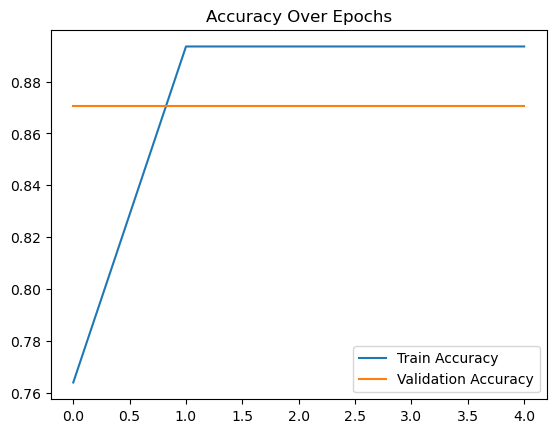

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


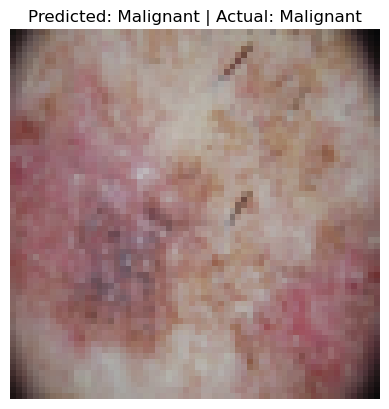

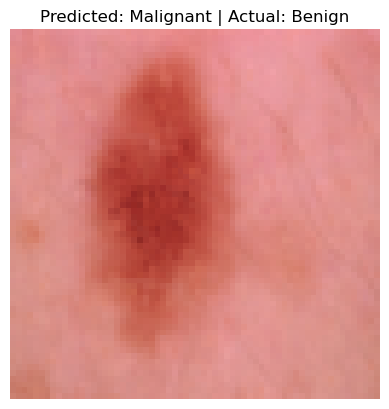

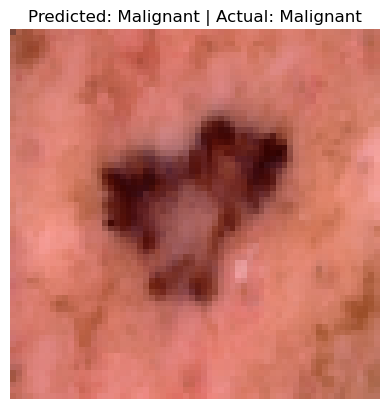

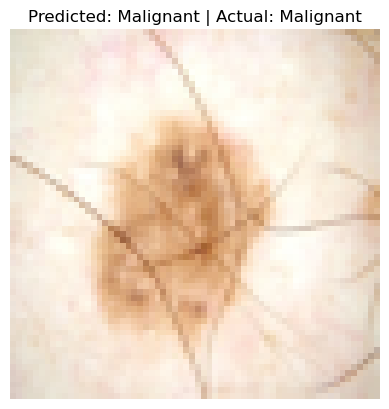

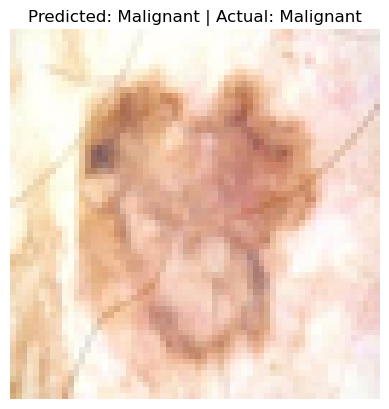

In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image
import random

# Load and prepare dataset
def load_images(folder_path, label, image_size=(64, 64)):
    data = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path).convert("RGB").resize(image_size)
        img_array = np.array(img) / 255.0  # Normalize
        data.append((img_array, label))
    return data

# Load benign and malignant samples
benign_data = load_images(r"C:\Users\heman\Downloads\archive (1)\train_cancer\benign", 0)
malignant_data = load_images(r"C:\Users\heman\Downloads\archive (1)\train_cancer\malignant", 1)

# Combine and split the data
all_data = benign_data + malignant_data
X, y = zip(*all_data)
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model
model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Predict and display results
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Show 5 random test samples with prediction
# random.seed(42)
for i in random.sample(range(len(X_test)), 5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {'Malignant' if predicted_labels[i] == 1 else 'Benign'} | Actual: {'Malignant' if y_test[i] == 1 else 'Benign'}")
    plt.axis('off')
    plt.show()


In [2]:
# !pip install tensorflow

Accuracy: 0.9259259259259259
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.92      1.00      0.96        47

    accuracy                           0.93        54
   macro avg       0.96      0.71      0.78        54
weighted avg       0.93      0.93      0.91        54



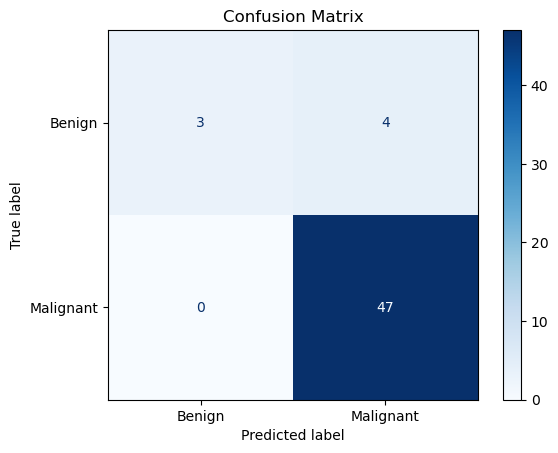

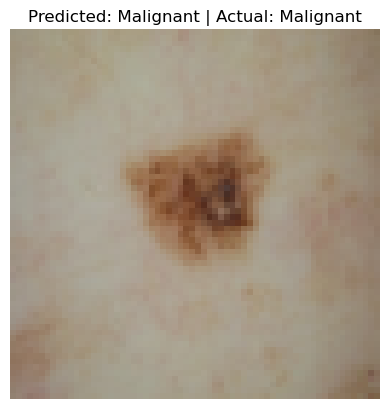

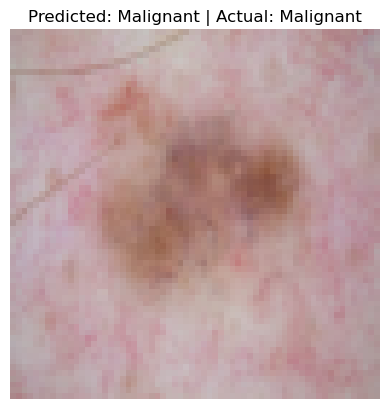

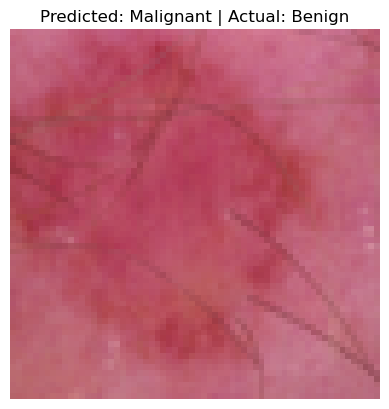

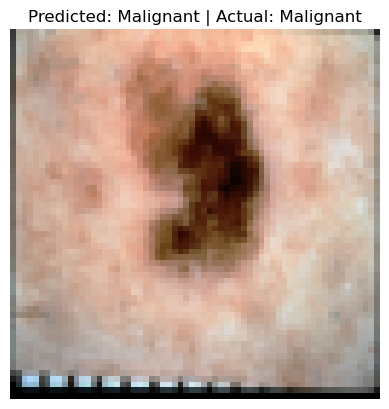

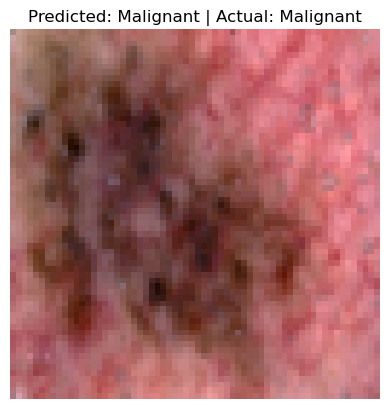

In [10]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
import matplotlib.pyplot as plt
import random

# Load and prepare dataset
def load_images(folder_path, label, image_size=(64, 64)):
    data = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path).convert("RGB").resize(image_size)
        img_array = np.array(img).flatten() / 255.0  # Flatten and normalize
        data.append((img_array, label))
    return data

# Load data
benign_data = load_images(r"C:\Users\heman\Downloads\archive (1)\train_cancer\benign", 0)
malignant_data = load_images(r"C:\Users\heman\Downloads\archive (1)\train_cancer\malignant", 1)

# Combine and split
all_data = benign_data + malignant_data
X, y = zip(*all_data)
X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Display predictions for 5 random samples
for i in random.sample(range(len(X_test)), 5):
    img = X_test[i].reshape(64, 64, 3)
    plt.imshow(img)
    plt.title(f"Predicted: {'Malignant' if y_pred[i]==1 else 'Benign'} | Actual: {'Malignant' if y_test[i]==1 else 'Benign'}")
    plt.axis('off')
    plt.show()

# sample_indices = random.sample(range(len(X_test)), 5)
# plt.figure(figsize=(15, 3))  # Width x Height of the plot
# # random_state=42
# for idx, i in enumerate(sample_indices):
#     img = X_test[i].reshape(64, 64, 3)
#     plt.subplot(1, 5, idx + 1)
#     plt.imshow(img)
#     plt.title(f"P: {'Malignant' if y_pred[i]==1 else 'Benign'}\nA: {'Malignant' if y_test[i]==1 else 'Benign'}")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()
